# Keşifçi Veri Analizi (Exploratory Data Analysis - EDA)

In [68]:
## Data Analysis Phase
## Understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Tüm satır ve sütunların görünmesi için ayar
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [69]:
# Train.csv ismi AdvancedHousePricing.csv olarak değiştirildi.
dataset=pd.read_csv('AdvancedHousePricing.csv')

## datanın satır ve sütun yapısını getirir
print(dataset.shape)

(1460, 81)


In [70]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Veri Analizinde aşağıdakileri Bulmak İçin Analiz Yapacağız
1. Dosyaları ve özellikleri inceleme
2. Eksik Değerler
3. Tüm Sayısal Değişkenler
4. Sayısal Değişkenlerin Dağılımı
5. Kategorik Değişkenler
6. Kategorik Değişkenlerin Önem Derecesi
7. Aykırı Değerler
8. Bağımsız ve bağımlı özellik arasındaki ilişki (Sales Price)


## Veri dosyasını ve alan adlarını incelemek, düzenlemek

##### özet satırlarını ve sütunlarını sil
##### sayfa numaraları, boş satırlar vb. gibi ekstra satırları silin
##### Verilerin daha iyi anlaşılması için bazı sütunları birleştirebiliriz
##### gereksinimlerimize veya anlayışımıza göre bir sütunu birden fazla sütuna da bölebiliriz
##### alan adlarının türlerini incelemek, gerekirse değiştirmek


In [6]:
# Read_excel read_csv olarak düzenlendi.
#dataset_changed=pd.read_csv('AdvancedHousePricing.xlsx')
dataset=pd.read_csv('AdvancedHousePricing.csv', skiprows=2)

dataset.head()

,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976.1,Gable,CompShg,MetalSd,MetalSd.1,None,0,TA,TA.1,CBlock,Gd,TA.2,Gd.1,ALQ,978,Unf,0.1,284,1262,GasA,Ex,Y,SBrkr,1262.1,0.2,0.3,1262.2,0.4,1,2.1,0.5,3,1.1,TA.3,6.1,Typ,1.2,TA.4,Attchd,1976.2,RFn,2.2,460,TA.5,TA.6,Y.1,298,0.6,0.7,0.8,0.9,0.10,NA.1,NA.2,NA.3,0.11,5,2007,WD,Normal,181500
0,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
1,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
2,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
3,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
4,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000


In [7]:
# Sayfa numaraları gibi gereksiz sütunları silme
# Gereksiz alanlar drop edilir
dataset.drop("Lvl", axis=1, inplace=True)
dataset.head()

,2,20,RL,80,9600,Pave,NA,Reg,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976.1,Gable,CompShg,MetalSd,MetalSd.1,None,0,TA,TA.1,CBlock,Gd,TA.2,Gd.1,ALQ,978,Unf,0.1,284,1262,GasA,Ex,Y,SBrkr,1262.1,0.2,0.3,1262.2,0.4,1,2.1,0.5,3,1.1,TA.3,6.1,Typ,1.2,TA.4,Attchd,1976.2,RFn,2.2,460,TA.5,TA.6,Y.1,298,0.6,0.7,0.8,0.9,0.10,NA.1,NA.2,NA.3,0.11,5,2007,WD,Normal,181500
0,3,60,RL,68.0,11250,Pave,NaN,IR1,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
1,4,70,RL,60.0,9550,Pave,NaN,IR1,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
2,5,60,RL,84.0,14260,Pave,NaN,IR1,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
3,6,50,RL,85.0,14115,Pave,NaN,IR1,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
4,7,20,RL,75.0,10084,Pave,NaN,Reg,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000


In [8]:
# Bazı alana adları birleştirilirken bazıları ise bir kaç alana ayrılır
dataset["20"] = dataset["20"].astype(str)
dataset["60"] = dataset["20"].apply(lambda x: str(x).split(",")[0])
dataset["70"] = dataset["20"].apply(lambda x: str(x).split(",")[1] if len(str(x).split(",")) > 1 else None)
dataset.drop("20", axis=1, inplace=True)
dataset.head()

,2,RL,80,9600,Pave,NA,Reg,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976.1,Gable,CompShg,MetalSd,MetalSd.1,None,0,TA,TA.1,CBlock,Gd,TA.2,Gd.1,ALQ,978,Unf,0.1,284,1262,GasA,Ex,Y,SBrkr,1262.1,0.2,0.3,1262.2,0.4,1,2.1,0.5,3,1.1,TA.3,6.1,Typ,1.2,TA.4,Attchd,1976.2,RFn,2.2,460,TA.5,TA.6,Y.1,298,0.6,0.7,0.8,0.9,0.10,NA.1,NA.2,NA.3,0.11,5,2007,WD,Normal,181500,60,70
0,3,RL,68.0,11250,Pave,NaN,IR1,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,60,None
1,4,RL,60.0,9550,Pave,NaN,IR1,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,70,None
2,5,RL,84.0,14260,Pave,NaN,IR1,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,60,None
3,6,RL,85.0,14115,Pave,NaN,IR1,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,50,None
4,7,RL,75.0,10084,Pave,NaN,Reg,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,20,None


In [67]:
dataset_test=pd.read_csv('AdvancedHousePricing.csv')

## print shape of dataset with rows and columns
print(dataset_test.shape)

(1460, 81)


In [9]:
## ilk beş kayıt
dataset.head()

,2,RL,80,9600,Pave,NA,Reg,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976.1,Gable,CompShg,MetalSd,MetalSd.1,None,0,TA,TA.1,CBlock,Gd,TA.2,Gd.1,ALQ,978,Unf,0.1,284,1262,GasA,Ex,Y,SBrkr,1262.1,0.2,0.3,1262.2,0.4,1,2.1,0.5,3,1.1,TA.3,6.1,Typ,1.2,TA.4,Attchd,1976.2,RFn,2.2,460,TA.5,TA.6,Y.1,298,0.6,0.7,0.8,0.9,0.10,NA.1,NA.2,NA.3,0.11,5,2007,WD,Normal,181500,60,70
0,3,RL,68.0,11250,Pave,NaN,IR1,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,60,None
1,4,RL,60.0,9550,Pave,NaN,IR1,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,70,None
2,5,RL,84.0,14260,Pave,NaN,IR1,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,60,None
3,6,RL,85.0,14115,Pave,NaN,IR1,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,50,None
4,7,RL,75.0,10084,Pave,NaN,Reg,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,20,None


In [15]:
#Dataset not found hatasının giderilmesi için buraya eklendi.
# Örnek bir veri kümesini yükleme
import pandas as pd
dataset_test = pd.read_csv('AdvancedHousePricing.csv')

In [16]:
dataset_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 81 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   2          1458 non-null   int64  
 1   RL         1458 non-null   object 
 2   80         1199 non-null   float64
 3   9600       1458 non-null   int64  
 4   Pave       1458 non-null   object 
 5   NA         91 non-null     object 
 6   Reg        1458 non-null   object 
 7   AllPub     1458 non-null   object 
 8   FR2        1458 non-null   object 
 9   Gtl        1458 non-null   object 
 10  Veenker    1458 non-null   object 
 11  Feedr      1458 non-null   object 
 12  Norm       1458 non-null   object 
 13  1Fam       1458 non-null   object 
 14  1Story     1458 non-null   object 
 15  6          1458 non-null   int64  
 16  8          1458 non-null   int64  
 17  1976       1458 non-null   int64  
 18  1976.1     1458 non-null   int64  
 19  Gable      1458 non-null   object 
 20  CompShg 

In [18]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
2,1458.0,731.500000,421.032659,3.0,367.25,731.5,1095.75,1460.0
80,1199.0,70.045872,24.302876,21.0,59.00,69.0,80.00,313.0
9600,1458.0,10518.874486,9987.937281,1300.0,7544.50,9478.5,11604.50,215245.0
6,1458.0,6.098765,1.383742,1.0,5.00,6.0,7.00,10.0
8,1458.0,5.574074,1.111647,1.0,5.00,5.0,6.00,9.0
1976,1458.0,1971.242798,30.211926,1872.0,1954.00,1972.5,2000.00,2010.0
1976.1,1458.0,1984.859396,20.652802,1950.0,1967.00,1994.0,2004.00,2010.0
0,1450.0,103.693103,181.154416,0.0,0.00,0.0,165.75,1600.0
978,1458.0,443.093278,456.144167,0.0,0.00,382.0,712.00,5644.0
0.1,1458.0,46.613169,161.420729,0.0,0.00,0.0,0.00,1474.0


## Eksik Değerler

Gerçekten kaybolmuş olabilir. Veri girilirken unutulmuş, gözden kaçmış olabilir.
Bu gözlem için böyle bir değer olmayabilir.
Değer gerçekten bilinmiyor veya tanımlanmıyor olabilir.

1. ##### Tamamiyle Rastgele Kayıp (Missing Completely at Random, MCAR)
Veri kümesi içinde eksik veri ile gözlemlenen veya eksik olan diğer değerler arasında kesinlikle bir ilişki yoktur. Başka bir deyişle, eksik olan veri noktaları verilerin rastgele bir alt kümesidir.
Örnek olarak; bir kütüphane kayıt defterinde kitap alan öğrencilerin isimleri yazıldığını düşünelim. Görevli deftere 2 kişinin defteri aldığı saati yazmayı unutuyor.
Bu durumda bu saat kayıp verisi tamamiyle rastgele oluşmuş oluyor.


2. ##### Rastgele Kayıp (Missing at Random, MAR)
Rastgele Kayıp , eksik değerlerin eğilimi ile gözlemlenen veriler arasında bir ilişki olduğunda ortaya çıkar. Başka bir deyişle, bir gözlemin eksik olma olasılığı mevcut bilgilere bağlıdır. (yani, veri kümesindeki diğer değişkenler)
Örnek olarak; bu kütüphanedeki kayıtları öğrencilerin kendileri aldığını düşünelim. Erkeklerin, kızlara göre daha unutkan olduğunu varsayalım. Haftalık defter incelendiğinde 10 kayıbın 9'u erkek 1'i kız öğrenciye ait olduğu görülmüştür.
Bu durumda kayıp verisi rastgele kayıp olmuş oluyor.

3. ##### Rastgele Olmayan Kayıp (Missing Data Not At Random MNAR):
MNAR, eksik olan bir değerin eğilimi ile değerleri arasında bir ilişki olduğu anlamına gelir. Yani oluşan bu kayıp verisi bir sebebi veya mekanizması olduğu için oluşmuştur.
Örnek olarak; görevli bazı kitapların çalındığını düşünmeye başlıyor. Sisteme baktığında bazı kişilerin fotoğrafları olmadığını görüyor. Bu durumda, eksik belgeler ile tahmin etmek istediğimiz hedef arasında sistematik bir ilişki vardır: hırsız.
MNAR göz ardı edilemez zaten “non-ignorable” şeklinde adlandırıyor. Bu kayıp verileri doldururken farklı bilgiler dahil ederek doldurulması gerekiyor. MCAR ve MAR ise “ignorable” diye adlandırılıyor. Yani bu kayıp verileri doldururken ekstra bir bilgiye ihtiyacınız olmayacaktır.
Sonuç olarak kayıp verileri tamamlarken hangi yöntemlerin kullanılacağına karar vermek için kayıp verilerinin mekanizmasını anlamak önemlidir.

##### missing value olan row ları drop etmek
##### replace edecek isek replace edildigine dair ayrı bir kolon oluşturup indicator koymak
##### direk 0 ile replace etmek
##### object type bir kolon ise mode u ile replace
##### continious bir kolon ise median ile replace

### Eksik Değerleri Bulmak

In [19]:
dataset.isnull().sum()

2               0
RL              0
80            259
9600            0
Pave            0
NA           1367
Reg             0
AllPub          0
FR2             0
Gtl             0
Veenker         0
Feedr           0
Norm            0
1Fam            0
1Story          0
6               0
8               0
1976            0
1976.1          0
Gable           0
CompShg         0
MetalSd         0
MetalSd.1       0
None          871
0               8
TA              0
TA.1            0
CBlock          0
Gd             37
TA.2           37
Gd.1           38
ALQ            37
978             0
Unf            38
0.1             0
284             0
1262            0
GasA            0
Ex              0
Y               0
SBrkr           1
1262.1          0
0.2             0
0.3             0
1262.2          0
0.4             0
1               0
2.1             0
0.5             0
3               0
1.1             0
TA.3            0
6.1             0
Typ             0
1.2             0
TA.4      

In [20]:
## burada her değişkenin içindeki eksik değer oranını buluyoruz
## 1- eksik değerleri olan özelliklerin listesini yapın
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- özellik adını ve eksik değerlerin yüzdesini yazdırın

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % eksik değer')

80 0.1776  % eksik değer
NA 0.9376  % eksik değer
None 0.5974  % eksik değer
0 0.0055  % eksik değer
Gd 0.0254  % eksik değer
TA.2 0.0254  % eksik değer
Gd.1 0.0261  % eksik değer
ALQ 0.0254  % eksik değer
Unf 0.0261  % eksik değer
TA.4 0.4726  % eksik değer
Attchd 0.0556  % eksik değer
1976.2 0.0556  % eksik değer
RFn 0.0556  % eksik değer
TA.5 0.0556  % eksik değer
TA.6 0.0556  % eksik değer
NA.1 0.9952  % eksik değer
NA.2 0.8073  % eksik değer
NA.3 0.963  % eksik değer
70 1.0  % eksik değer


### Çok sayıda eksik değer olduğundan, eksik değerler ile Sales Price arasındaki ilişkiyi bulmamız gerekiyor.

Bu ilişki için bir diyagram çizelim

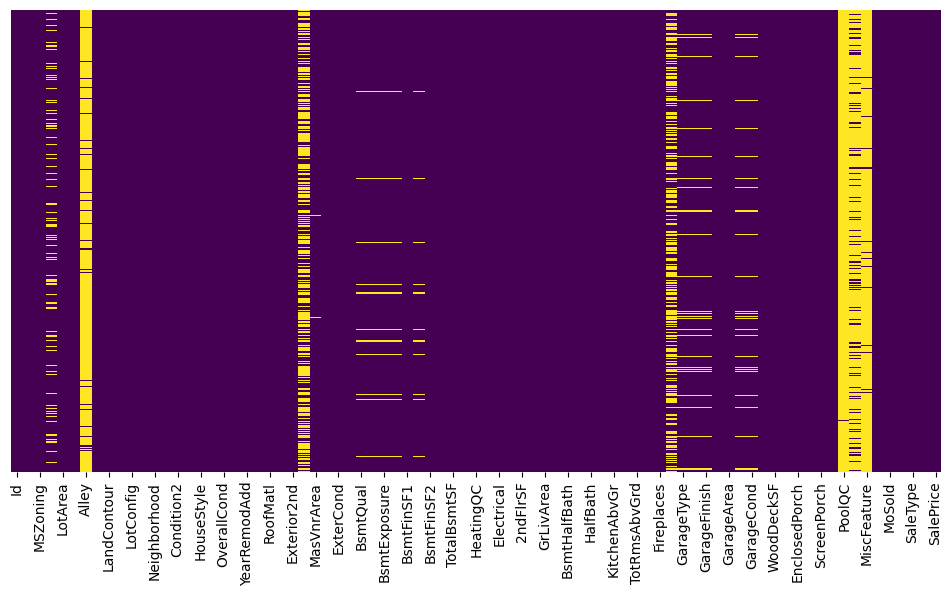

In [109]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis');

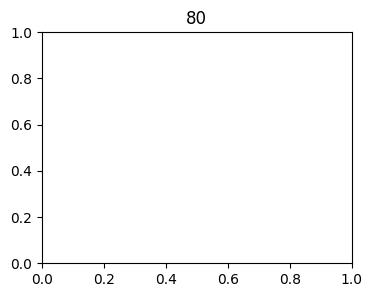

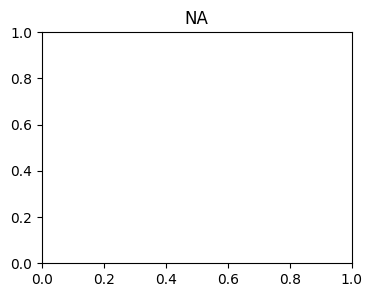

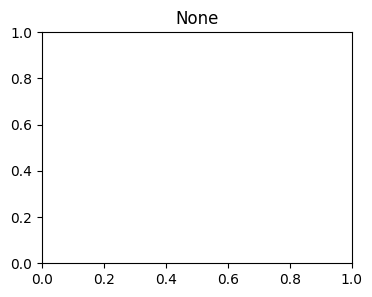

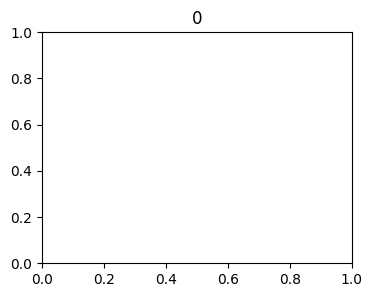

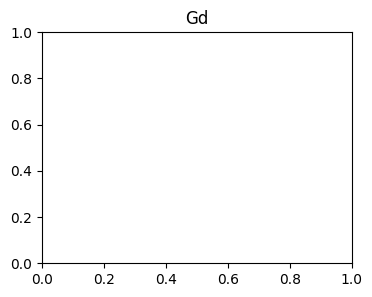

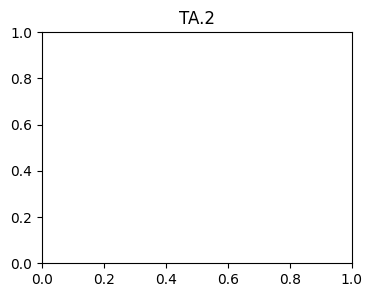

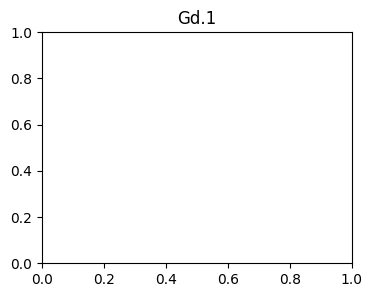

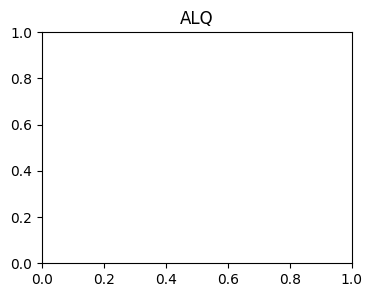

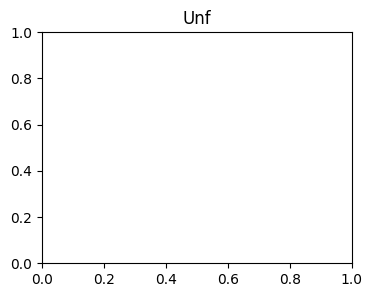

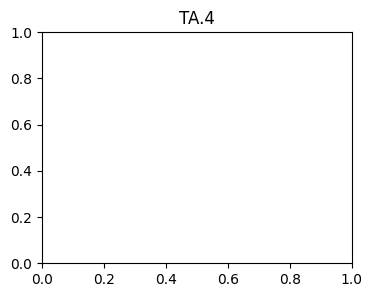

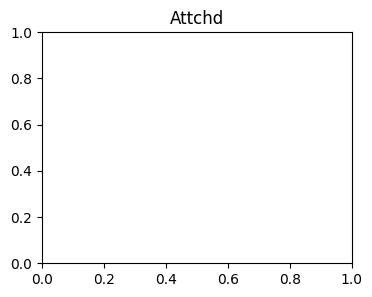

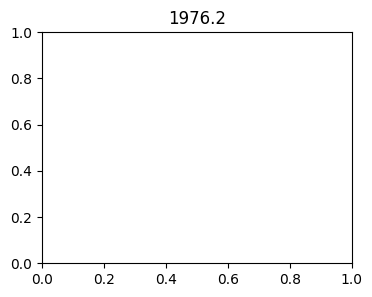

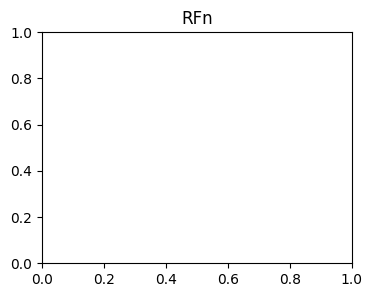

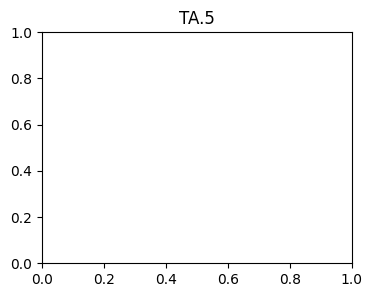

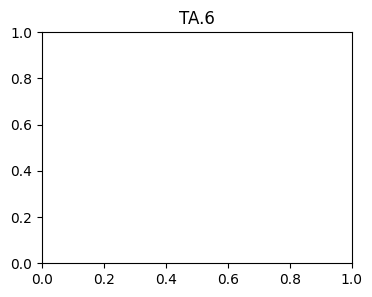

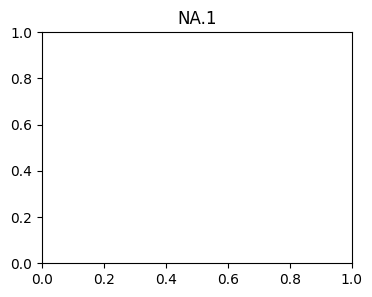

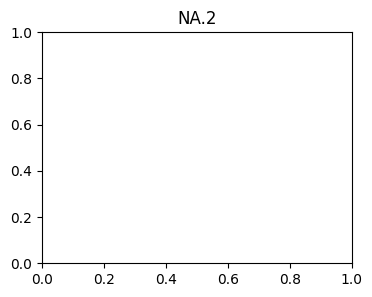

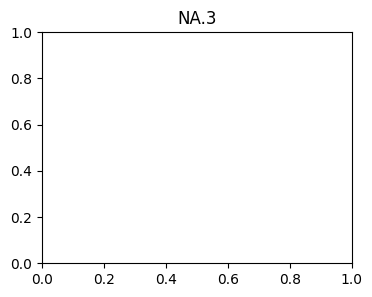

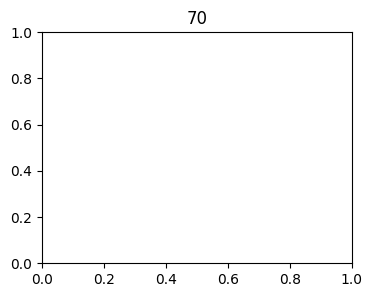

In [113]:
matplotlib.rcParams['figure.figsize'] = (4, 3)
for feature in features_with_na:
    data = dataset.copy()
    
    # gözlem eksikse 1'i, yoksa sıfırı gösteren bir değişken yapalım   
    #data[feature] = np.where(data[feature].isnull(), 1, 0)

    
    # bilgilerin eksik olduğu veya mevcut olduğu durumlarda SalePrice medianı hesaplayalım
    #data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

#### Burada eksik değerler ile bağımlı değişken arasındaki ilişki açıkça görülebilmektedir. Yani bu nan değerlerini, Feature Engineering bölümünde yapacağımız anlamlı bir şeyle değiştirmemiz gerekiyor.

## Numerical Variables

In [59]:
# sayısal değişkenlerin listesi
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# sayısal değişkenleri görelim
dataset[numerical_features].head()

Number of numerical variables:  37


,2,80,9600,6,8,1976,1976.1,0,978,0.1,284,1262,1262.1,0.2,0.3,1262.2,0.4,1,2.1,0.5,3,1.1,6.1,1.2,1976.2,2.2,460,298,0.6,0.7,0.8,0.9,0.10,0.11,5,2007,181500
0,3,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
1,4,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
2,5,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
3,6,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000
4,7,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000


### Zamansal Değişkenler (Datetime Variables)

Veri Kümesinden 4 yıl değişkenimiz var. Bu özel senaryoya bir örnek, evin inşa edildiği yıl ile satıldığı yıl arasındaki yıllar farkı olabilir.

In [74]:
# yıl bilgisini içeren değişkenlerin listesi
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

[]

In [75]:
# bu yıl değişkenlerinin icerigine bakalım
for feature in year_feature:
    print(feature, dataset[feature].unique())

In [82]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Text(0.5, 1.0, 'House Price vs YrSold')

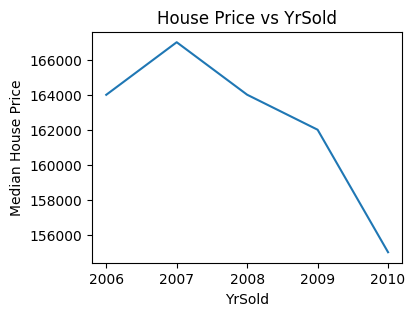

In [85]:
# Year Sold YrSold olarak düzenlendi.
## Zamansal değişkenleri inceleyelim
## Evin satıldığı yıl ile satış fiyatı arasında bir ilişki olup olmadığına bakacağız.

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('YrSold')
plt.ylabel('Median House Price')
plt.title("House Price vs YrSold")


Yıllar ilerledikçe fiyatların azalması pek mantıklı değil, o halde farklı bir gözlem yapmayı deneyelim

In [ ]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

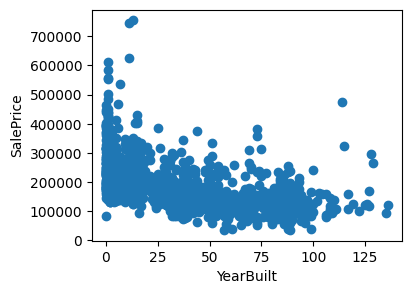

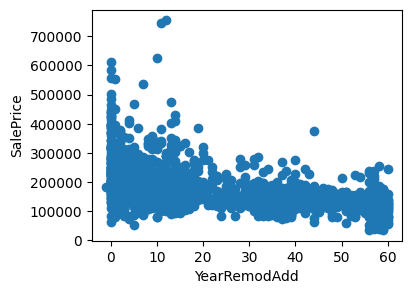

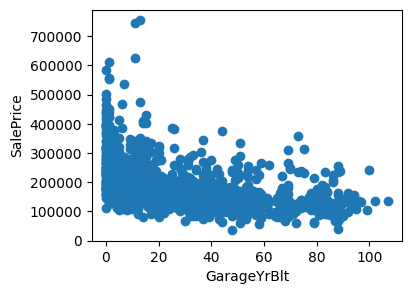

In [ ]:
## Burada Tüm Yıl değişkenleri ile SalePrice arasındaki ilişkiye bakacağız.

for feature in year_feature:
    if feature!='YrSold':
        data=dataset.copy()
        ## Diğer yıl değişkenileri ile evin satıldığı yıl arasındaki farkı yakalayacağız
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

### Kesikli Sayısal Değişkenler

In [ ]:
## Sayısal veriler iki ana türe ayrılır
## 1. Sürekli ve Kesikli  Değişkenler

discrete_features=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Kesikli Değişken Sayısı: {}".format(len(discrete_features)))

Kesikli Değişken Sayısı: 17


In [ ]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [ ]:
dataset[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


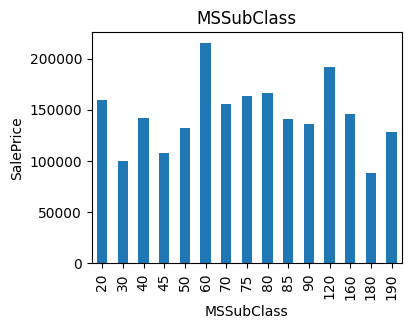

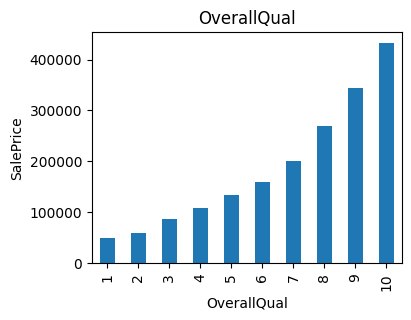

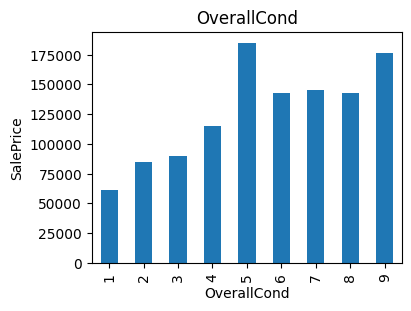

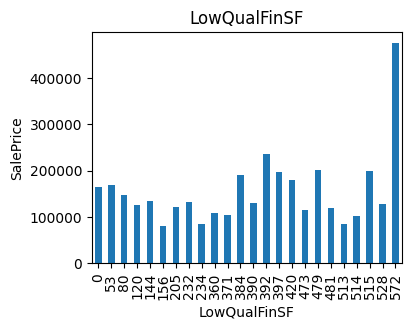

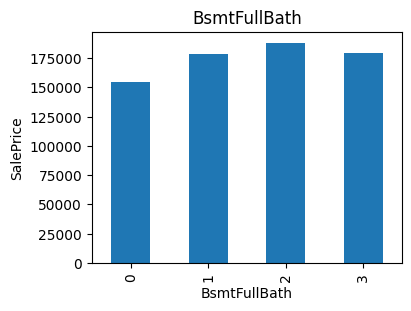

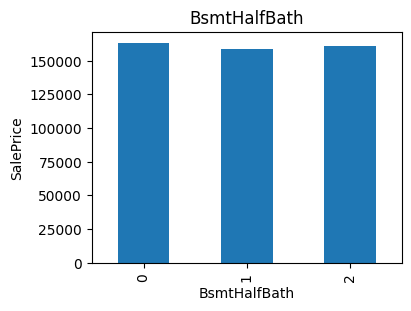

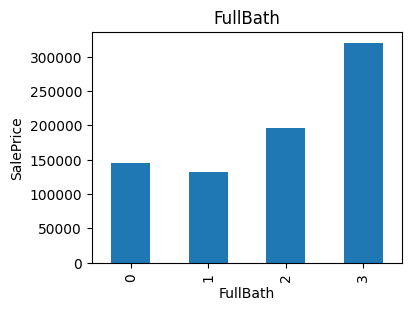

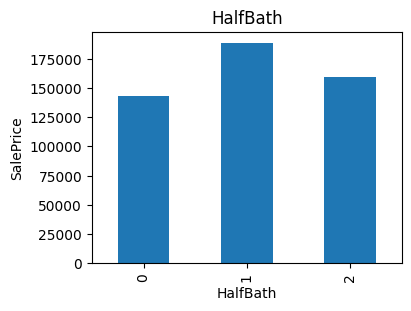

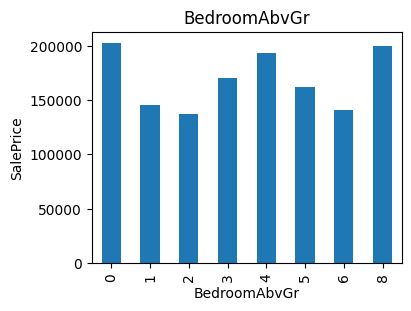

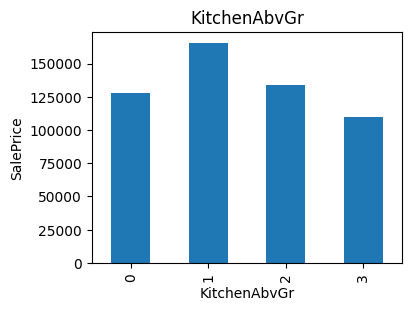

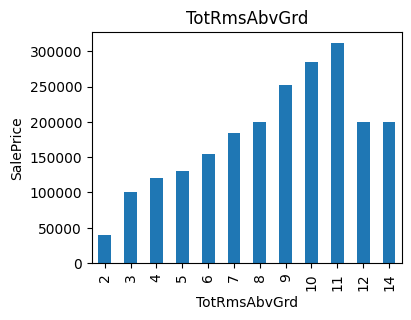

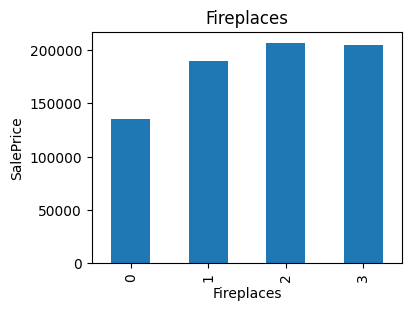

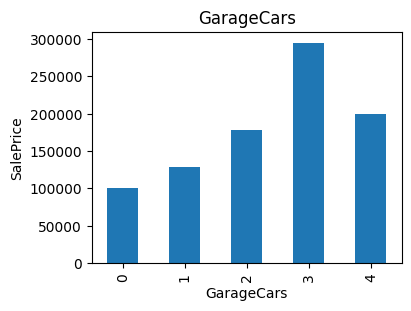

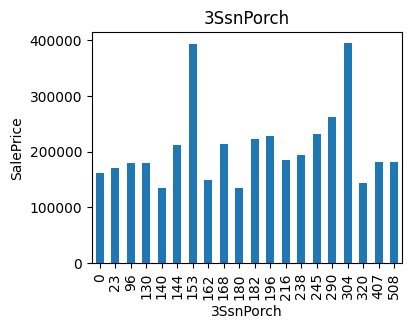

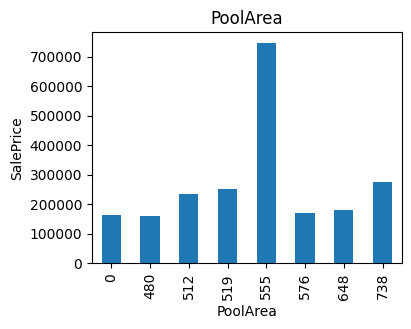

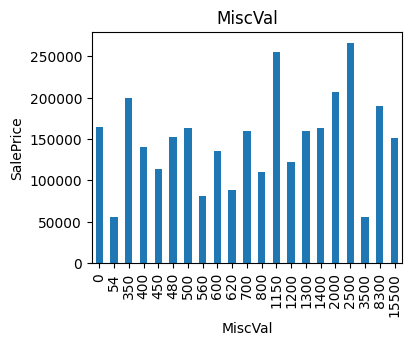

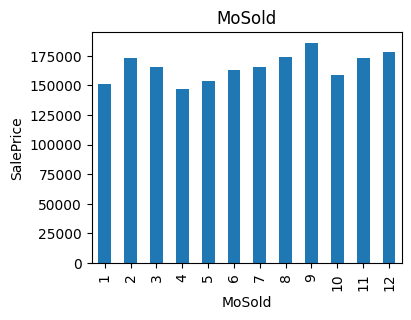

In [ ]:
## Gelin Satış Fiyatıyla Aralarındaki İlişkiyi Bulalım

for feature in discrete_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [ ]:
## Sayısal değişkenler ile SalePrice arasında bir ilişki olduğu görünüyor

###  Sürekli Sayısal Değişkenler

In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_features+year_feature+['Id']]
print("Sürekli Değişken Sayısı {}".format(len(continuous_feature)))

Sürekli Değişken Sayısı 16


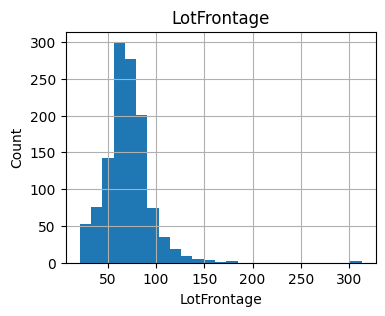

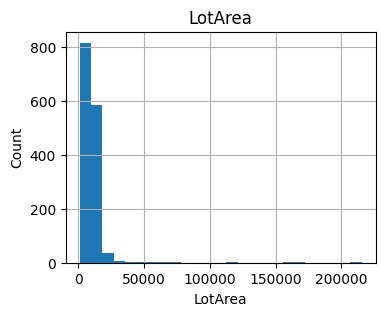

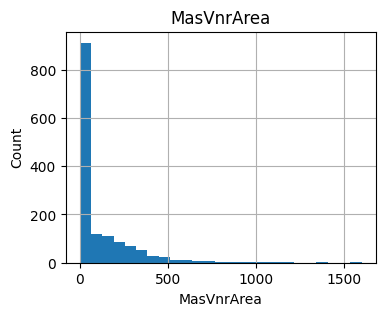

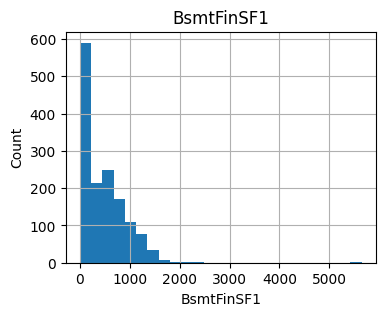

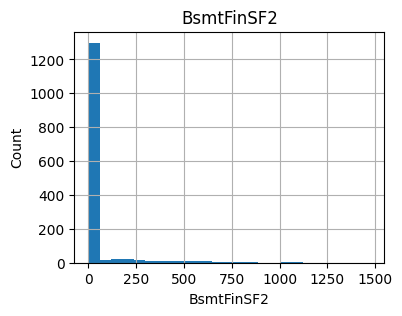

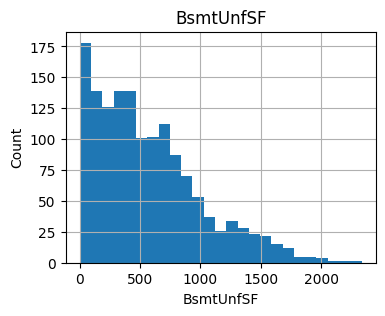

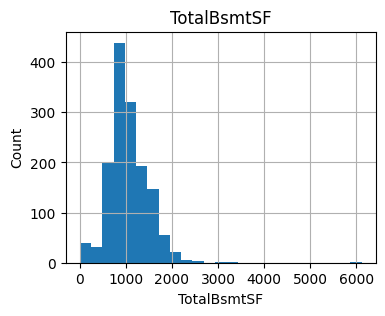

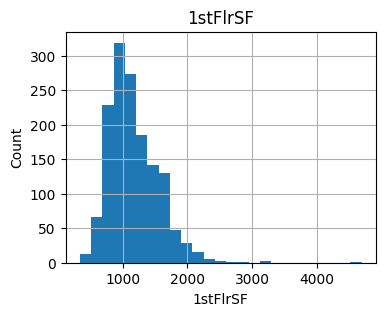

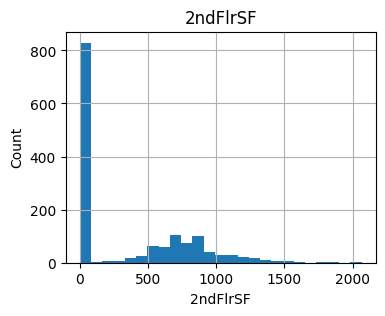

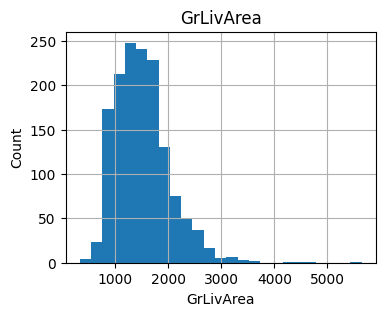

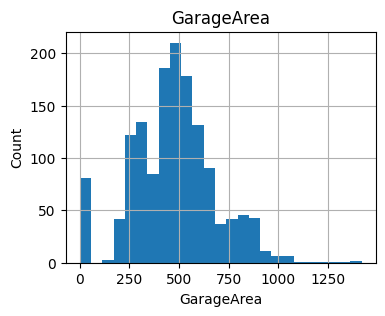

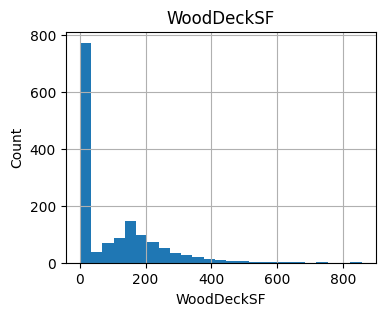

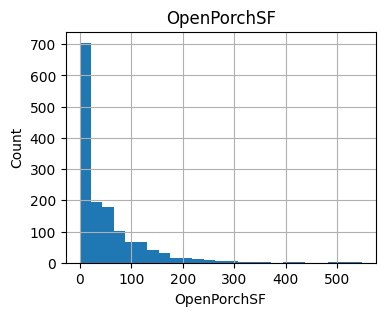

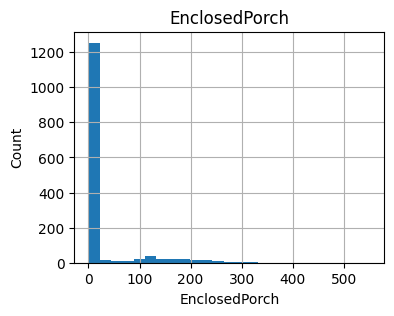

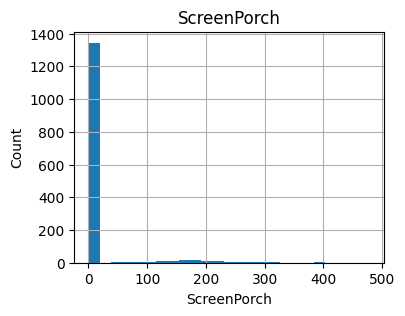

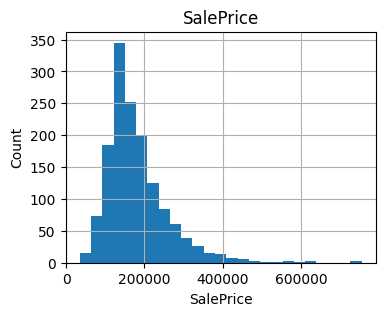

In [ ]:
## Dağılımı anlamak için histogramlar oluşturarak sürekli değerleri analiz edelim

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


### Normal dagılımda olmayan sürekli sayısal değişkenleri normalize etme
Sayısal değişkenler çarpık olduğundan log normal dağılımını gerçekleştireceğiz

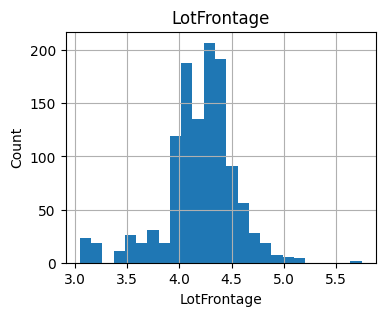

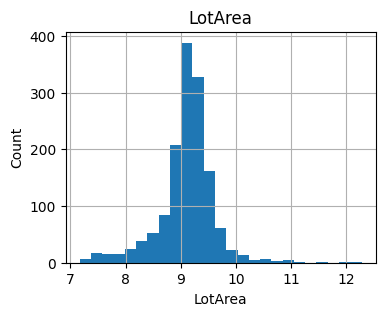

passed!
passed!
passed!
passed!
passed!


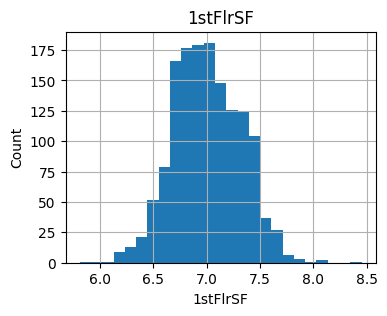

passed!


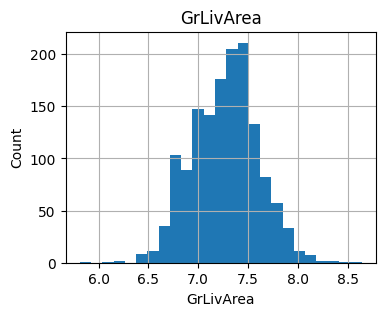

passed!
passed!
passed!
passed!
passed!


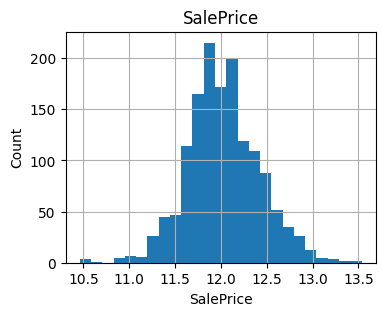

In [ ]:
## We will be using logarithmic transformation

for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
        print("passed!")
    else:
        data[feature]=np.log(data[feature])
        # data['SalePrice']=np.log(data['SalePrice'])
        # plt.scatter(data[feature],data['SalePrice'])
        # plt.xlabel(feature)
        # plt.ylabel('SalesPrice')
        # plt.title(feature)
        # plt.show()
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()
        
    

## Outliers

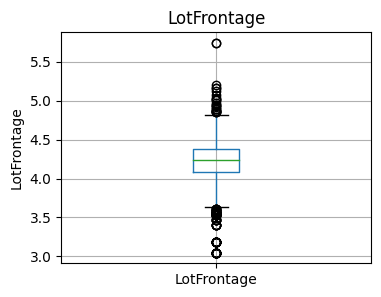

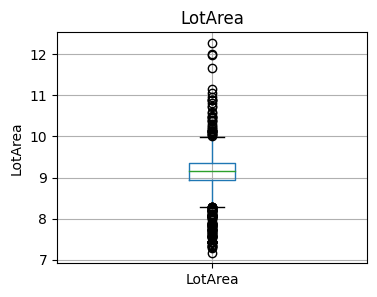

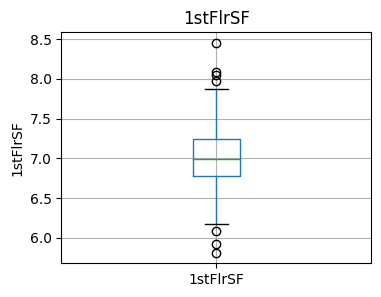

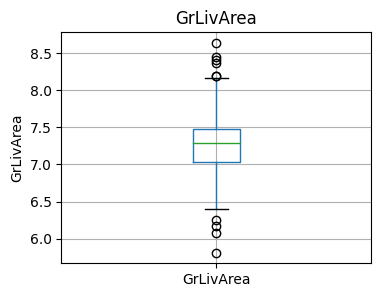

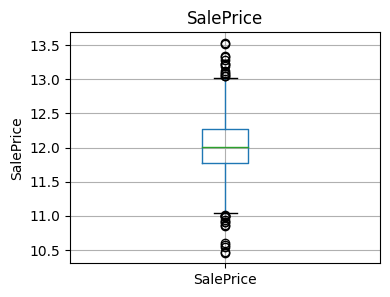

In [ ]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        
    

## Categorical Variables

In [ ]:
# dtypes
# 'b'       boolean
# 'i'       (signed) integer
# 'u'       unsigned integer
# 'f'       floating-point
# 'c'       complex-floating point
# 'O'       (Python) objects

# 'S', 'a'  (byte-)string
# 'U'       Unicode
# 'V'       raw data (void) 

In [ ]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'Condition1',
 'Condition2']

In [ ]:
dataset[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,Condition1,Condition2
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,Norm,Norm
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,Feedr,Norm
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,Norm,Norm
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,Norm,Norm
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,Norm,Norm


In [ ]:
for feature in categorical_features:
    print('{} değişkeninin kategori sayısı {}'.format(feature,len(dataset[feature].unique())))

MSZoning değişkeninin kategori sayısı 5
Street değişkeninin kategori sayısı 2
Alley değişkeninin kategori sayısı 3
LotShape değişkeninin kategori sayısı 4
LandContour değişkeninin kategori sayısı 4
Utilities değişkeninin kategori sayısı 2
LotConfig değişkeninin kategori sayısı 5
LandSlope değişkeninin kategori sayısı 3
Neighborhood değişkeninin kategori sayısı 25
BldgType değişkeninin kategori sayısı 5
HouseStyle değişkeninin kategori sayısı 8
RoofStyle değişkeninin kategori sayısı 6
RoofMatl değişkeninin kategori sayısı 8
Exterior1st değişkeninin kategori sayısı 15
Exterior2nd değişkeninin kategori sayısı 16
MasVnrType değişkeninin kategori sayısı 5
ExterQual değişkeninin kategori sayısı 4
ExterCond değişkeninin kategori sayısı 5
Foundation değişkeninin kategori sayısı 6
BsmtQual değişkeninin kategori sayısı 5
BsmtCond değişkeninin kategori sayısı 5
BsmtExposure değişkeninin kategori sayısı 5
BsmtFinType1 değişkeninin kategori sayısı 7
BsmtFinType2 değişkeninin kategori sayısı 7
Heati

In [ ]:
## Kategorik değişkenler ve SalesPrice arasındaki ilişkileri inceleyelim

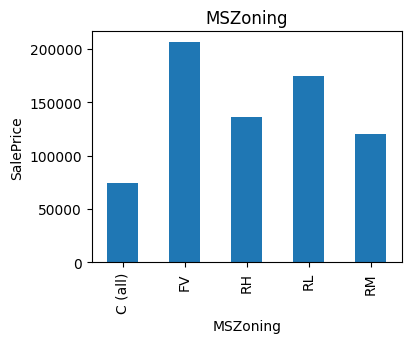

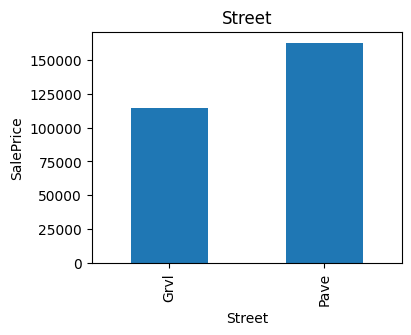

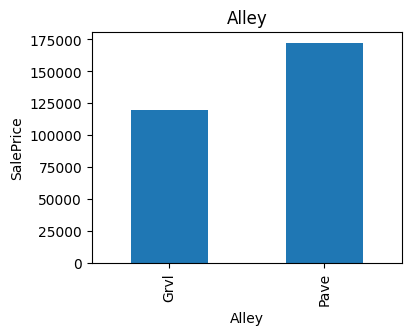

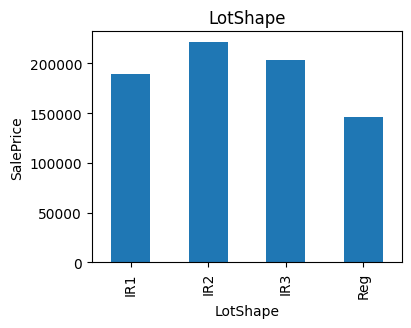

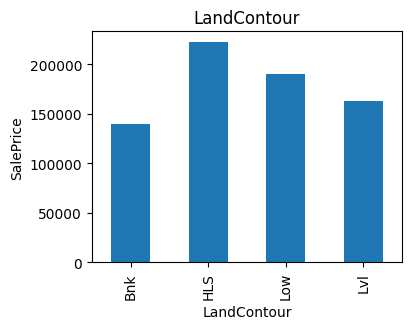

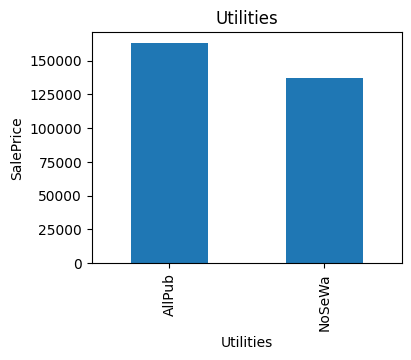

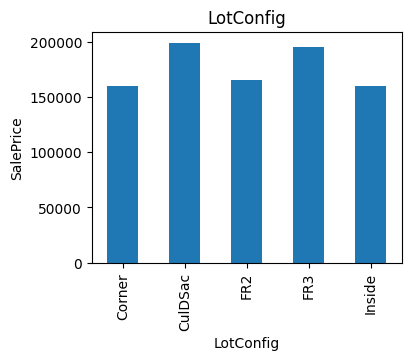

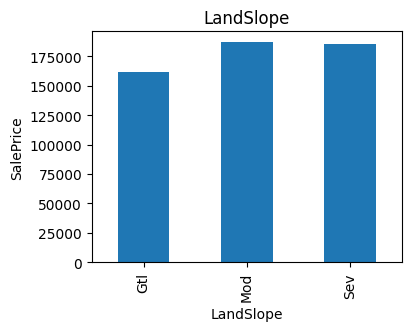

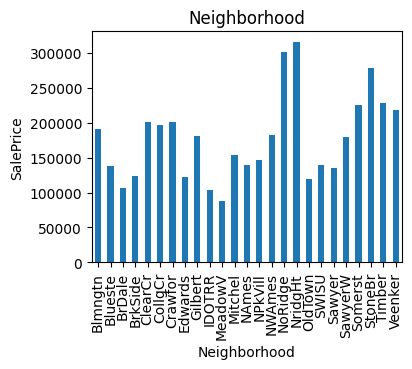

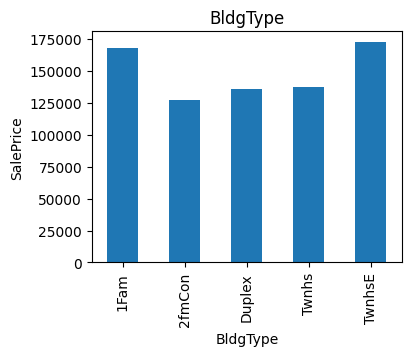

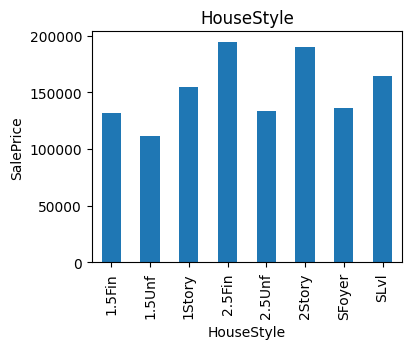

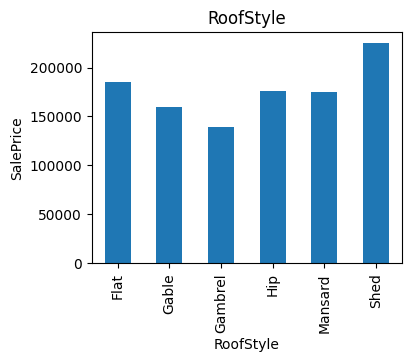

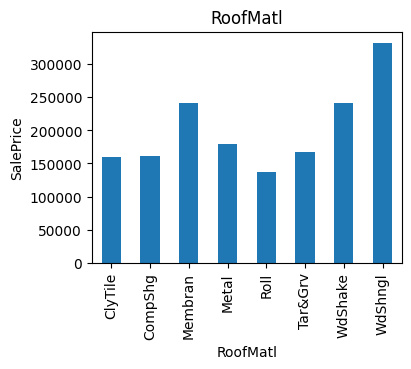

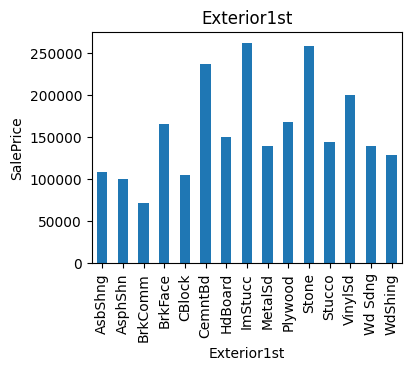

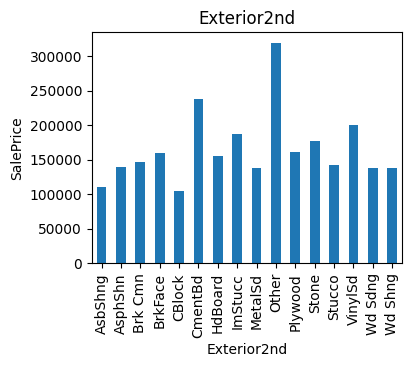

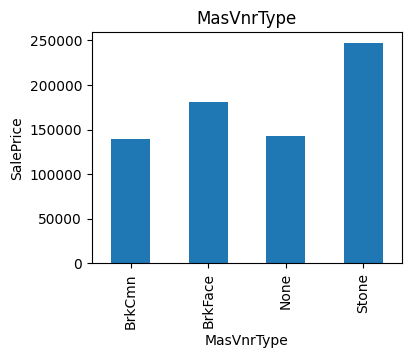

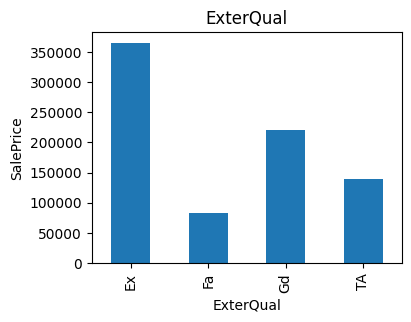

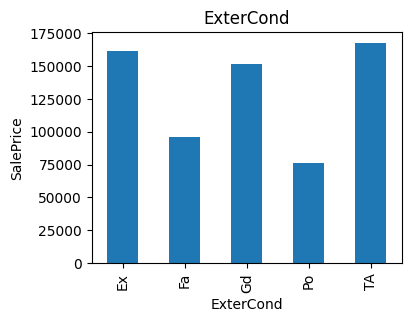

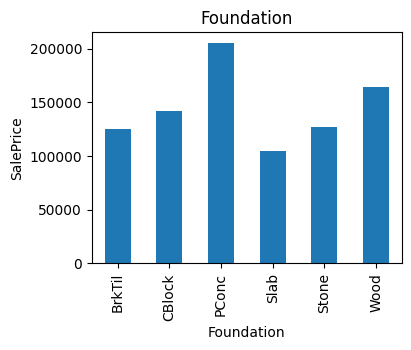

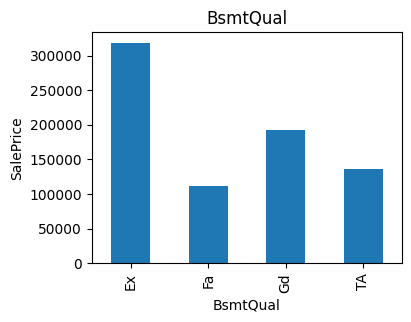

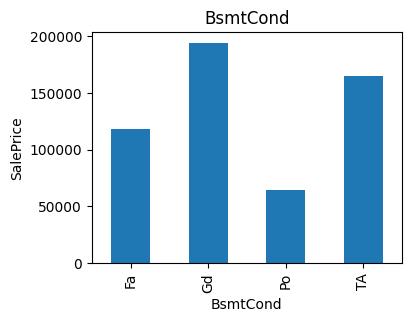

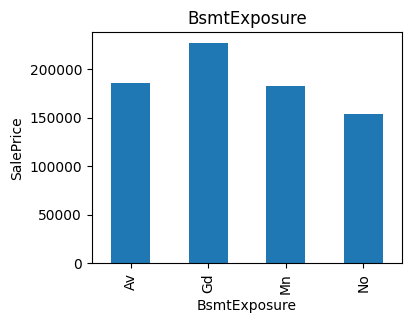

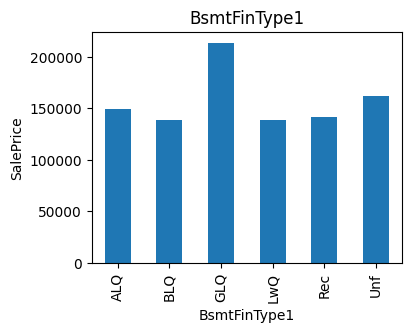

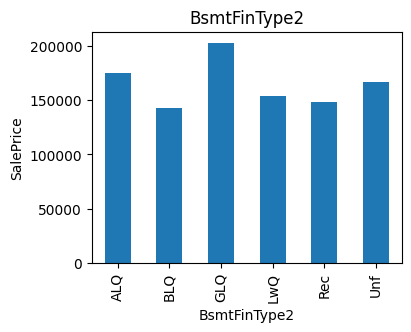

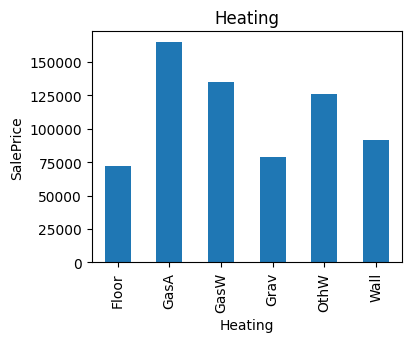

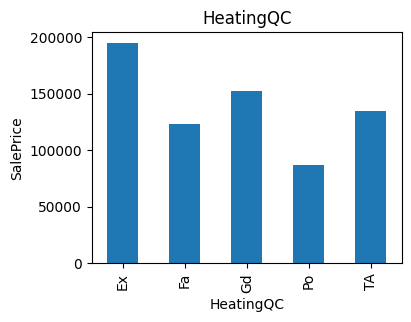

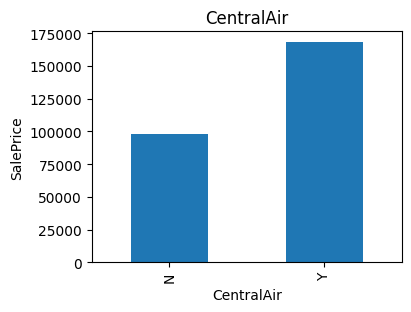

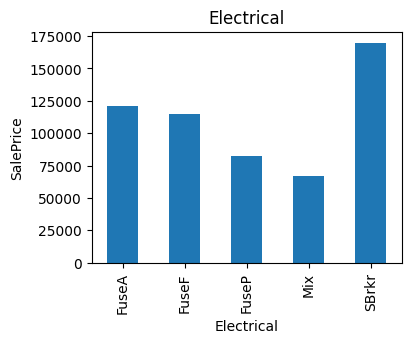

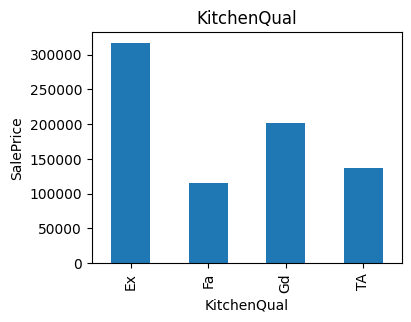

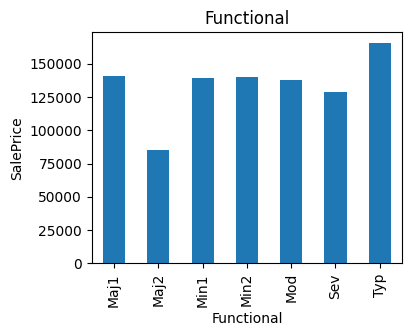

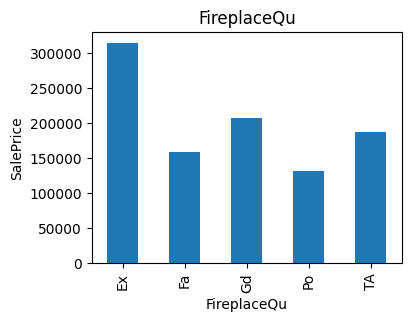

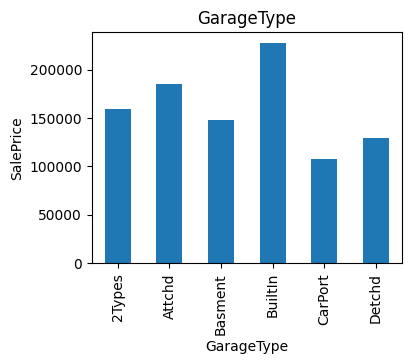

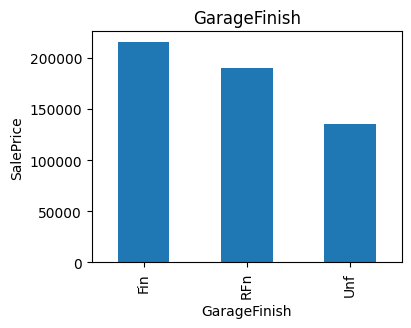

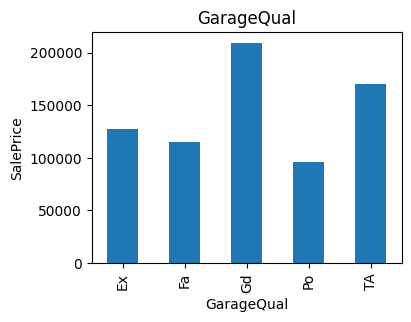

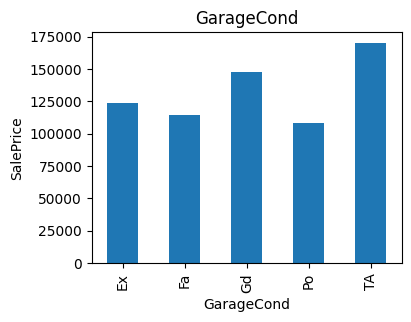

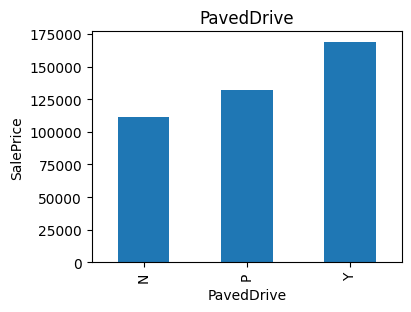

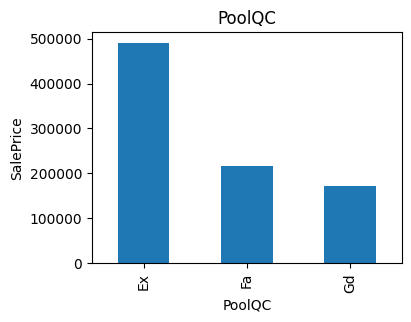

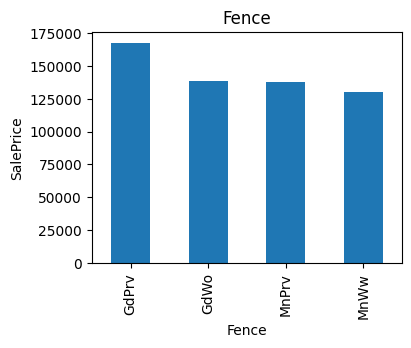

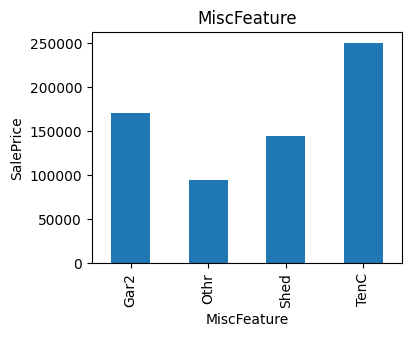

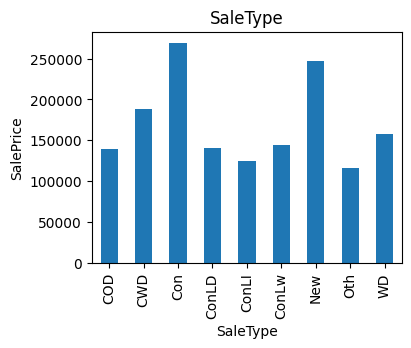

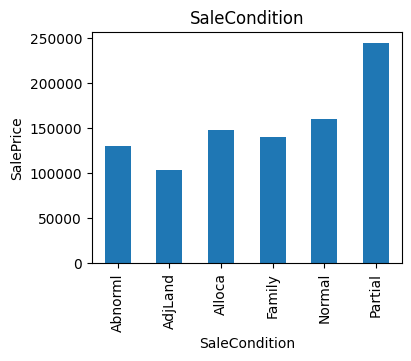

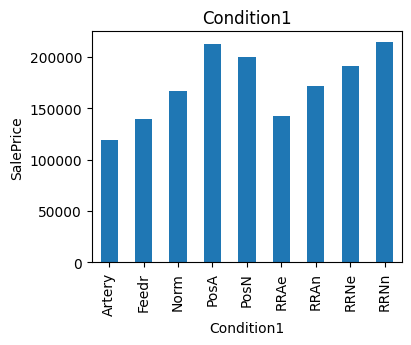

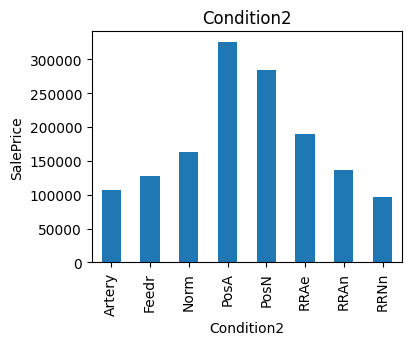

In [ ]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()